# s-p-500-stock-prediction-real-world-machine-learning-model

Use the "Run" button to execute the code.

In [1]:
#!pip install jovian --upgrade --quiet

In [2]:
#import jovian

In [3]:
!pip install numpy pandas matplotlib seaborn --quiet
import sys
!{sys.executable} -m pip install graphviz

In [4]:
!pip install graphviz

In [5]:
pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


This project labeled SP 500 Stock Prediction Real World Machine Learning Model will apply gradient boosting to a real-world dataset from kaggle project Stock Market Analysis + Predictioin using LSTM.  It provied a dataset with historical stock prices for 5 years for all companies found on the S&P 500 index as of February 2018.  The predicion of stocks and other financial instruments have been a difficult with changing internal and external factors.  The task is to forecast the "Closing" stock price of each company in the S&P 500.  This project will attempt to predict the closing price of all the stocks for the next day.

In [6]:
# Execute this to save new versions of the notebook
#jovian.commit(project="s-p-500-stock-prediction-real-world-machine-learning-model")

In [7]:
!pip install scikit-learn --upgrade --quiet

In [8]:
!pip install opendatasets --upgrade --quiet

In [9]:
import sys

In [10]:
!conda install --yes --prefix {sys.prefix} opendatasets


PackagesNotFoundError: The following packages are not available from current channels:

  - opendatasets

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.





Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.


In [11]:
import sys
!{sys.executable} -m pip install opendatasets

In [12]:
dataset_url = 'https://www.kaggle.com/camnugent/sandp500'


In [13]:
import opendatasets as od


In [14]:
od.download(dataset_url, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: viengkeok
Your Kaggle Key: ········


100%|██████████| 19.3M/19.3M [00:00<00:00, 29.8MB/s]


In [15]:
#jovian.commit()

In [16]:
import os

In [17]:
data_dir = './sandp500'

In [18]:
os.listdir(data_dir)

['all_stocks_5yr.csv', 'getSandP.py', 'individual_stocks_5yr', 'merge.sh']

In [19]:
train_csv = data_dir + '/all_stocks_5yr.csv'

In [20]:
!pip install pandas

In [21]:
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
# With these code, nothing is shown at all


In [22]:
raw_df = pd.read_csv(train_csv)

In [23]:
raw_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [25]:
#discarding the rows where the value is missing to 
#make our analysis and modeling simpler
raw_df.dropna(subset=['open', 'high', 'low', 'close', 'volume'], inplace=True)
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


In [26]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


In [27]:
raw_df.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [28]:
#jovian.commit()

In [29]:
Date = pd.to_datetime(raw_df.date)

In [30]:
Date

0        2013-02-08
1        2013-02-11
2        2013-02-12
3        2013-02-13
4        2013-02-14
            ...    
619035   2018-02-01
619036   2018-02-02
619037   2018-02-05
619038   2018-02-06
619039   2018-02-07
Name: date, Length: 619029, dtype: datetime64[ns]

In [31]:
train_df = raw_df[Date < pd.to_datetime('2017-3-8')]
test_df = raw_df[Date > pd.to_datetime('2017-3-7')]


In [32]:
train_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.1200,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.0100,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.5100,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.9400,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.9600,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
618802,2017-03-01,53.73,54.0800,53.55,53.89,3581081,ZTS
618803,2017-03-02,54.00,54.0800,53.31,53.37,3299974,ZTS
618804,2017-03-03,53.34,53.7175,53.25,53.42,2483602,ZTS
618805,2017-03-06,53.01,53.3250,52.88,53.08,1832305,ZTS


In [33]:
test_df

,date,open,high,low,close,volume,Name
1026,2017-03-08,44.79,45.30,44.597,44.89,5521109,AAL
1027,2017-03-09,44.50,44.93,43.250,43.33,9330139,AAL
1028,2017-03-10,43.46,43.95,42.970,43.90,6842316,AAL
1029,2017-03-13,43.73,44.12,42.260,42.37,8882287,AAL
1030,2017-03-14,42.06,42.10,40.840,41.21,10208460,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.690,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.730,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.180,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.130,73.27,4924323,ZTS


In [34]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [35]:
split_date(train_df)
split_date(test_df)

C:\Users\viengkeo\AppData\Local\Temp\ipykernel_3532\3689399763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['date'])
C:\Users\viengkeo\AppData\Local\Temp\ipykernel_3532\3689399763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.Date.dt.year
C:\Users\viengkeo\AppData\Local\Temp\ipykernel_3532\3689399763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [36]:
train_df

,date,open,high,low,close,volume,Name,Date,Year,Month,Day,WeekOfYear
0,2013-02-08,15.07,15.1200,14.63,14.75,8407500,AAL,2013-02-08,2013,2,8,6
1,2013-02-11,14.89,15.0100,14.26,14.46,8882000,AAL,2013-02-11,2013,2,11,7
2,2013-02-12,14.45,14.5100,14.10,14.27,8126000,AAL,2013-02-12,2013,2,12,7
3,2013-02-13,14.30,14.9400,14.25,14.66,10259500,AAL,2013-02-13,2013,2,13,7
4,2013-02-14,14.94,14.9600,13.16,13.99,31879900,AAL,2013-02-14,2013,2,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...
618802,2017-03-01,53.73,54.0800,53.55,53.89,3581081,ZTS,2017-03-01,2017,3,1,9
618803,2017-03-02,54.00,54.0800,53.31,53.37,3299974,ZTS,2017-03-02,2017,3,2,9
618804,2017-03-03,53.34,53.7175,53.25,53.42,2483602,ZTS,2017-03-03,2017,3,3,9
618805,2017-03-06,53.01,53.3250,52.88,53.08,1832305,ZTS,2017-03-06,2017,3,6,10


In [37]:
test_df

,date,open,high,low,close,volume,Name,Date,Year,Month,Day,WeekOfYear
1026,2017-03-08,44.79,45.30,44.597,44.89,5521109,AAL,2017-03-08,2017,3,8,10
1027,2017-03-09,44.50,44.93,43.250,43.33,9330139,AAL,2017-03-09,2017,3,9,10
1028,2017-03-10,43.46,43.95,42.970,43.90,6842316,AAL,2017-03-10,2017,3,10,10
1029,2017-03-13,43.73,44.12,42.260,42.37,8882287,AAL,2017-03-13,2017,3,13,11
1030,2017-03-14,42.06,42.10,40.840,41.21,10208460,AAL,2017-03-14,2017,3,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.690,77.82,2982259,ZTS,2018-02-01,2018,2,1,5
619036,2018-02-02,77.53,78.12,76.730,76.78,2595187,ZTS,2018-02-02,2018,2,2,5
619037,2018-02-05,76.64,76.92,73.180,73.83,2962031,ZTS,2018-02-05,2018,2,5,6
619038,2018-02-06,72.74,74.56,72.130,73.27,4924323,ZTS,2018-02-06,2018,2,6,6


In [38]:
#jovian.commit()

In [39]:
train_df.Name.unique()


array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK',
       'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY', 'BDX',
       'BEN', 'BF.B', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK.B', 'BSX',
       'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA', 'CBG', 'CBOE', 'CBS',
       'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CFG', 'CF', 'CHD',
       'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL',
       'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSRA', 'CSX',
       'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO',

In [40]:
test_df.Name.unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [41]:
train_df_tempname = train_df.Name.unique()

In [42]:
test_df_tempname = test_df.Name.unique()

In [43]:
#jovian.commit()

In [44]:
train_date = pd.to_datetime(train_df['date'])
test_date = pd.to_datetime(test_df['date'])


In [45]:
train_date

0        2013-02-08
1        2013-02-11
2        2013-02-12
3        2013-02-13
4        2013-02-14
            ...    
618802   2017-03-01
618803   2017-03-02
618804   2017-03-03
618805   2017-03-06
618806   2017-03-07
Name: date, Length: 501867, dtype: datetime64[ns]

In [46]:
test_date

1026     2017-03-08
1027     2017-03-09
1028     2017-03-10
1029     2017-03-13
1030     2017-03-14
            ...    
619035   2018-02-01
619036   2018-02-02
619037   2018-02-05
619038   2018-02-06
619039   2018-02-07
Name: date, Length: 117162, dtype: datetime64[ns]

In [47]:
input_cols = ['open', 'high', 'low', 'volume', 'Day', 'Month', 'Year', 'WeekOfYear']
target_col = ['close']

In [48]:
import random
import string

def get_id():
    return ''.join(random.choice(string.digits) for n in range(3))
driver_id = train_df_tempname
unique_id=[]
while len(unique_id)!=len(driver_id):
    id = get_id()
    if id not in unique_id:
        unique_id.append(id)
print(unique_id)

['021', '309', '233', '374', '066', '831', '632', '147', '508', '664', '631', '265', '097', '761', '661', '601', '626', '408', '128', '902', '711', '522', '415', '345', '740', '826', '203', '803', '961', '284', '467', '425', '510', '860', '953', '148', '505', '928', '955', '855', '709', '380', '217', '497', '995', '564', '001', '924', '697', '103', '730', '657', '469', '153', '300', '196', '174', '213', '138', '139', '971', '045', '776', '208', '641', '528', '729', '968', '627', '662', '748', '948', '121', '861', '775', '334', '754', '835', '915', '853', '354', '081', '449', '982', '099', '038', '372', '442', '437', '472', '918', '873', '323', '198', '289', '387', '784', '114', '503', '407', '076', '074', '480', '376', '904', '011', '026', '789', '411', '367', '434', '562', '577', '375', '077', '905', '847', '163', '965', '155', '270', '307', '704', '456', '639', '834', '313', '448', '640', '804', '743', '684', '432', '856', '493', '567', '085', '259', '594', '532', '593', '429', '511'

In [49]:
len(unique_id)

500

In [50]:
name_dictionary = {}
for x in range(len(unique_id)):
   new_key = train_df_tempname[x]
   new_id = unique_id[x]
   name_dictionary[new_key] = new_id
print(name_dictionary)

{'AAL': '021', 'AAPL': '309', 'AAP': '233', 'ABBV': '374', 'ABC': '066', 'ABT': '831', 'ACN': '632', 'ADBE': '147', 'ADI': '508', 'ADM': '664', 'ADP': '631', 'ADSK': '265', 'ADS': '097', 'AEE': '761', 'AEP': '661', 'AES': '601', 'AET': '626', 'AFL': '408', 'AGN': '128', 'AIG': '902', 'AIV': '711', 'AIZ': '522', 'AJG': '415', 'AKAM': '345', 'ALB': '740', 'ALGN': '826', 'ALK': '203', 'ALLE': '803', 'ALL': '961', 'ALXN': '284', 'AMAT': '467', 'AMD': '425', 'AME': '510', 'AMGN': '860', 'AMG': '953', 'AMP': '148', 'AMT': '505', 'AMZN': '928', 'ANDV': '955', 'ANSS': '855', 'ANTM': '709', 'AON': '380', 'AOS': '217', 'APA': '497', 'APC': '995', 'APD': '564', 'APH': '001', 'ARE': '924', 'ARNC': '697', 'ATVI': '103', 'AVB': '730', 'AVGO': '657', 'AVY': '469', 'AWK': '153', 'AXP': '300', 'AYI': '196', 'AZO': '174', 'A': '213', 'BAC': '138', 'BAX': '139', 'BA': '971', 'BBT': '045', 'BBY': '776', 'BDX': '208', 'BEN': '641', 'BF.B': '528', 'BIIB': '729', 'BK': '968', 'BLK': '627', 'BLL': '662', 'BMY

In [51]:
import pandas as pd
import numpy as np
train_df2 = train_df.replace({"Name": name_dictionary})
print(train_df2)


              date   open     high    low  close    volume Name       Date  \
0       2013-02-08  15.07  15.1200  14.63  14.75   8407500  021 2013-02-08   
1       2013-02-11  14.89  15.0100  14.26  14.46   8882000  021 2013-02-11   
2       2013-02-12  14.45  14.5100  14.10  14.27   8126000  021 2013-02-12   
3       2013-02-13  14.30  14.9400  14.25  14.66  10259500  021 2013-02-13   
4       2013-02-14  14.94  14.9600  13.16  13.99  31879900  021 2013-02-14   
...            ...    ...      ...    ...    ...       ...  ...        ...   
618802  2017-03-01  53.73  54.0800  53.55  53.89   3581081  030 2017-03-01   
618803  2017-03-02  54.00  54.0800  53.31  53.37   3299974  030 2017-03-02   
618804  2017-03-03  53.34  53.7175  53.25  53.42   2483602  030 2017-03-03   
618805  2017-03-06  53.01  53.3250  52.88  53.08   1832305  030 2017-03-06   
618806  2017-03-07  52.86  53.3750  52.64  53.07   2763243  030 2017-03-07   

        Year  Month  Day  WeekOfYear  
0       2013      2    8

In [52]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501867 entries, 0 to 618806
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        501867 non-null  object        
 1   open        501867 non-null  float64       
 2   high        501867 non-null  float64       
 3   low         501867 non-null  float64       
 4   close       501867 non-null  float64       
 5   volume      501867 non-null  int64         
 6   Name        501867 non-null  object        
 7   Date        501867 non-null  datetime64[ns]
 8   Year        501867 non-null  int64         
 9   Month       501867 non-null  int64         
 10  Day         501867 non-null  int64         
 11  WeekOfYear  501867 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 48.3+ MB


In [53]:
import pandas as pd
import numpy as np
test_df2 = test_df.replace({"Name": name_dictionary})
print(test_df2)

              date   open   high     low  close    volume Name       Date  \
1026    2017-03-08  44.79  45.30  44.597  44.89   5521109  021 2017-03-08   
1027    2017-03-09  44.50  44.93  43.250  43.33   9330139  021 2017-03-09   
1028    2017-03-10  43.46  43.95  42.970  43.90   6842316  021 2017-03-10   
1029    2017-03-13  43.73  44.12  42.260  42.37   8882287  021 2017-03-13   
1030    2017-03-14  42.06  42.10  40.840  41.21  10208460  021 2017-03-14   
...            ...    ...    ...     ...    ...       ...  ...        ...   
619035  2018-02-01  76.84  78.27  76.690  77.82   2982259  030 2018-02-01   
619036  2018-02-02  77.53  78.12  76.730  76.78   2595187  030 2018-02-02   
619037  2018-02-05  76.64  76.92  73.180  73.83   2962031  030 2018-02-05   
619038  2018-02-06  72.74  74.56  72.130  73.27   4924323  030 2018-02-06   
619039  2018-02-07  72.70  75.00  72.690  73.86   4534912  030 2018-02-07   

        Year  Month  Day  WeekOfYear  
1026    2017      3    8          10

In [54]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117162 entries, 1026 to 619039
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        117162 non-null  object        
 1   open        117162 non-null  float64       
 2   high        117162 non-null  float64       
 3   low         117162 non-null  float64       
 4   close       117162 non-null  float64       
 5   volume      117162 non-null  int64         
 6   Name        117162 non-null  object        
 7   Date        117162 non-null  datetime64[ns]
 8   Year        117162 non-null  int64         
 9   Month       117162 non-null  int64         
 10  Day         117162 non-null  int64         
 11  WeekOfYear  117162 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 11.3+ MB


In [55]:
inputs = train_df2[input_cols].copy()
targets = train_df2[target_col].copy()
#actual data in the colums are transferred to inputs and targets

In [56]:
test_inputs = test_df2[input_cols].copy()
test_targets = test_df2[target_col].copy()
#why I did not include test_targets


In [57]:
numeric_cols = ['open', 'high', 'low', 'volume', 'Day', 'Month', 'Year', 'WeekOfYear']

In [58]:
inputs[numeric_cols].isna().sum()

open          0
high          0
low           0
volume        0
Day           0
Month         0
Year          0
WeekOfYear    0
dtype: int64

In [59]:
test_inputs[numeric_cols].isna().sum()

open          0
high          0
low           0
volume        0
Day           0
Month         0
Year          0
WeekOfYear    0
dtype: int64

In [60]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501867 entries, 0 to 618806
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        501867 non-null  float64
 1   high        501867 non-null  float64
 2   low         501867 non-null  float64
 3   volume      501867 non-null  int64  
 4   Day         501867 non-null  int64  
 5   Month       501867 non-null  int64  
 6   Year        501867 non-null  int64  
 7   WeekOfYear  501867 non-null  UInt32 
dtypes: UInt32(1), float64(3), int64(4)
memory usage: 33.0 MB


In [61]:
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117162 entries, 1026 to 619039
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        117162 non-null  float64
 1   high        117162 non-null  float64
 2   low         117162 non-null  float64
 3   volume      117162 non-null  int64  
 4   Day         117162 non-null  int64  
 5   Month       117162 non-null  int64  
 6   Year        117162 non-null  int64  
 7   WeekOfYear  117162 non-null  UInt32 
dtypes: UInt32(1), float64(3), int64(4)
memory usage: 7.7 MB


In [62]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501867 entries, 0 to 618806
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   close   501867 non-null  float64
dtypes: float64(1)
memory usage: 7.7 MB


In [63]:
test_inputs

,open,high,low,volume,Day,Month,Year,WeekOfYear
1026,44.79,45.30,44.597,5521109,8,3,2017,10
1027,44.50,44.93,43.250,9330139,9,3,2017,10
1028,43.46,43.95,42.970,6842316,10,3,2017,10
1029,43.73,44.12,42.260,8882287,13,3,2017,11
1030,42.06,42.10,40.840,10208460,14,3,2017,11
...,...,...,...,...,...,...,...,...
619035,76.84,78.27,76.690,2982259,1,2,2018,5
619036,77.53,78.12,76.730,2595187,2,2,2018,5
619037,76.64,76.92,73.180,2962031,5,2,2018,6
619038,72.74,74.56,72.130,4924323,6,2,2018,6


In [64]:
inputs

,open,high,low,volume,Day,Month,Year,WeekOfYear
0,15.07,15.1200,14.63,8407500,8,2,2013,6
1,14.89,15.0100,14.26,8882000,11,2,2013,7
2,14.45,14.5100,14.10,8126000,12,2,2013,7
3,14.30,14.9400,14.25,10259500,13,2,2013,7
4,14.94,14.9600,13.16,31879900,14,2,2013,7
...,...,...,...,...,...,...,...,...
618802,53.73,54.0800,53.55,3581081,1,3,2017,9
618803,54.00,54.0800,53.31,3299974,2,3,2017,9
618804,53.34,53.7175,53.25,2483602,3,3,2017,9
618805,53.01,53.3250,52.88,1832305,6,3,2017,10


In [65]:
#jovian.commit()              

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [68]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])


In [69]:
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


In [70]:
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117162 entries, 1026 to 619039
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        117162 non-null  float64
 1   high        117162 non-null  float64
 2   low         117162 non-null  float64
 3   volume      117162 non-null  float64
 4   Day         117162 non-null  float64
 5   Month       117162 non-null  float64
 6   Year        117162 non-null  float64
 7   WeekOfYear  117162 non-null  float64
dtypes: float64(8)
memory usage: 8.0 MB


In [71]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501867 entries, 0 to 618806
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        501867 non-null  float64
 1   high        501867 non-null  float64
 2   low         501867 non-null  float64
 3   volume      501867 non-null  float64
 4   Day         501867 non-null  float64
 5   Month       501867 non-null  float64
 6   Year        501867 non-null  float64
 7   WeekOfYear  501867 non-null  float64
dtypes: float64(8)
memory usage: 34.5 MB


In [72]:
inputs

,open,high,low,volume,Day,Month,Year,WeekOfYear
0,0.007733,0.007689,0.007593,0.013599,0.233333,0.090909,0.0,0.096154
1,0.007629,0.007626,0.007379,0.014366,0.333333,0.090909,0.0,0.115385
2,0.007376,0.007340,0.007286,0.013143,0.366667,0.090909,0.0,0.115385
3,0.007290,0.007586,0.007373,0.016594,0.400000,0.090909,0.0,0.115385
4,0.007658,0.007597,0.006743,0.051565,0.433333,0.090909,0.0,0.115385
...,...,...,...,...,...,...,...,...
618802,0.029959,0.029994,0.030099,0.005792,0.000000,0.181818,1.0,0.153846
618803,0.030114,0.029994,0.029960,0.005337,0.033333,0.181818,1.0,0.153846
618804,0.029735,0.029786,0.029925,0.004017,0.066667,0.181818,1.0,0.153846
618805,0.029545,0.029561,0.029711,0.002963,0.166667,0.181818,1.0,0.173077


In [73]:
test_inputs


,open,high,low,volume,Day,Month,Year,WeekOfYear
1026,0.024819,0.024967,0.024922,0.008930,0.233333,0.181818,1.00,0.173077
1027,0.024652,0.024755,0.024143,0.015091,0.266667,0.181818,1.00,0.173077
1028,0.024055,0.024194,0.023981,0.011067,0.300000,0.181818,1.00,0.173077
1029,0.024210,0.024292,0.023570,0.014367,0.400000,0.181818,1.00,0.192308
1030,0.023250,0.023135,0.022749,0.016512,0.433333,0.181818,1.00,0.192308
...,...,...,...,...,...,...,...,...
619035,0.043245,0.043843,0.043480,0.004823,0.000000,0.090909,1.25,0.076923
619036,0.043642,0.043757,0.043503,0.004197,0.033333,0.090909,1.25,0.076923
619037,0.043130,0.043070,0.041450,0.004791,0.133333,0.090909,1.25,0.096154
619038,0.040888,0.041719,0.040843,0.007965,0.166667,0.090909,1.25,0.096154


In [74]:
X = inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [75]:
from xgboost import XGBRegressor

In [76]:
?XGBRegressor

In [77]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [78]:
%%time
model.fit(X, targets)

CPU times: total: 29.9 s
Wall time: 3.58 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [79]:
preds = model.predict(X)

In [80]:
preds

array([15.632113, 15.632113, 13.49391 , ..., 52.861134, 52.861134,
       52.861134], dtype=float32)

In [81]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [82]:
rmse(preds, targets)

1.7087648375479776

In [83]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

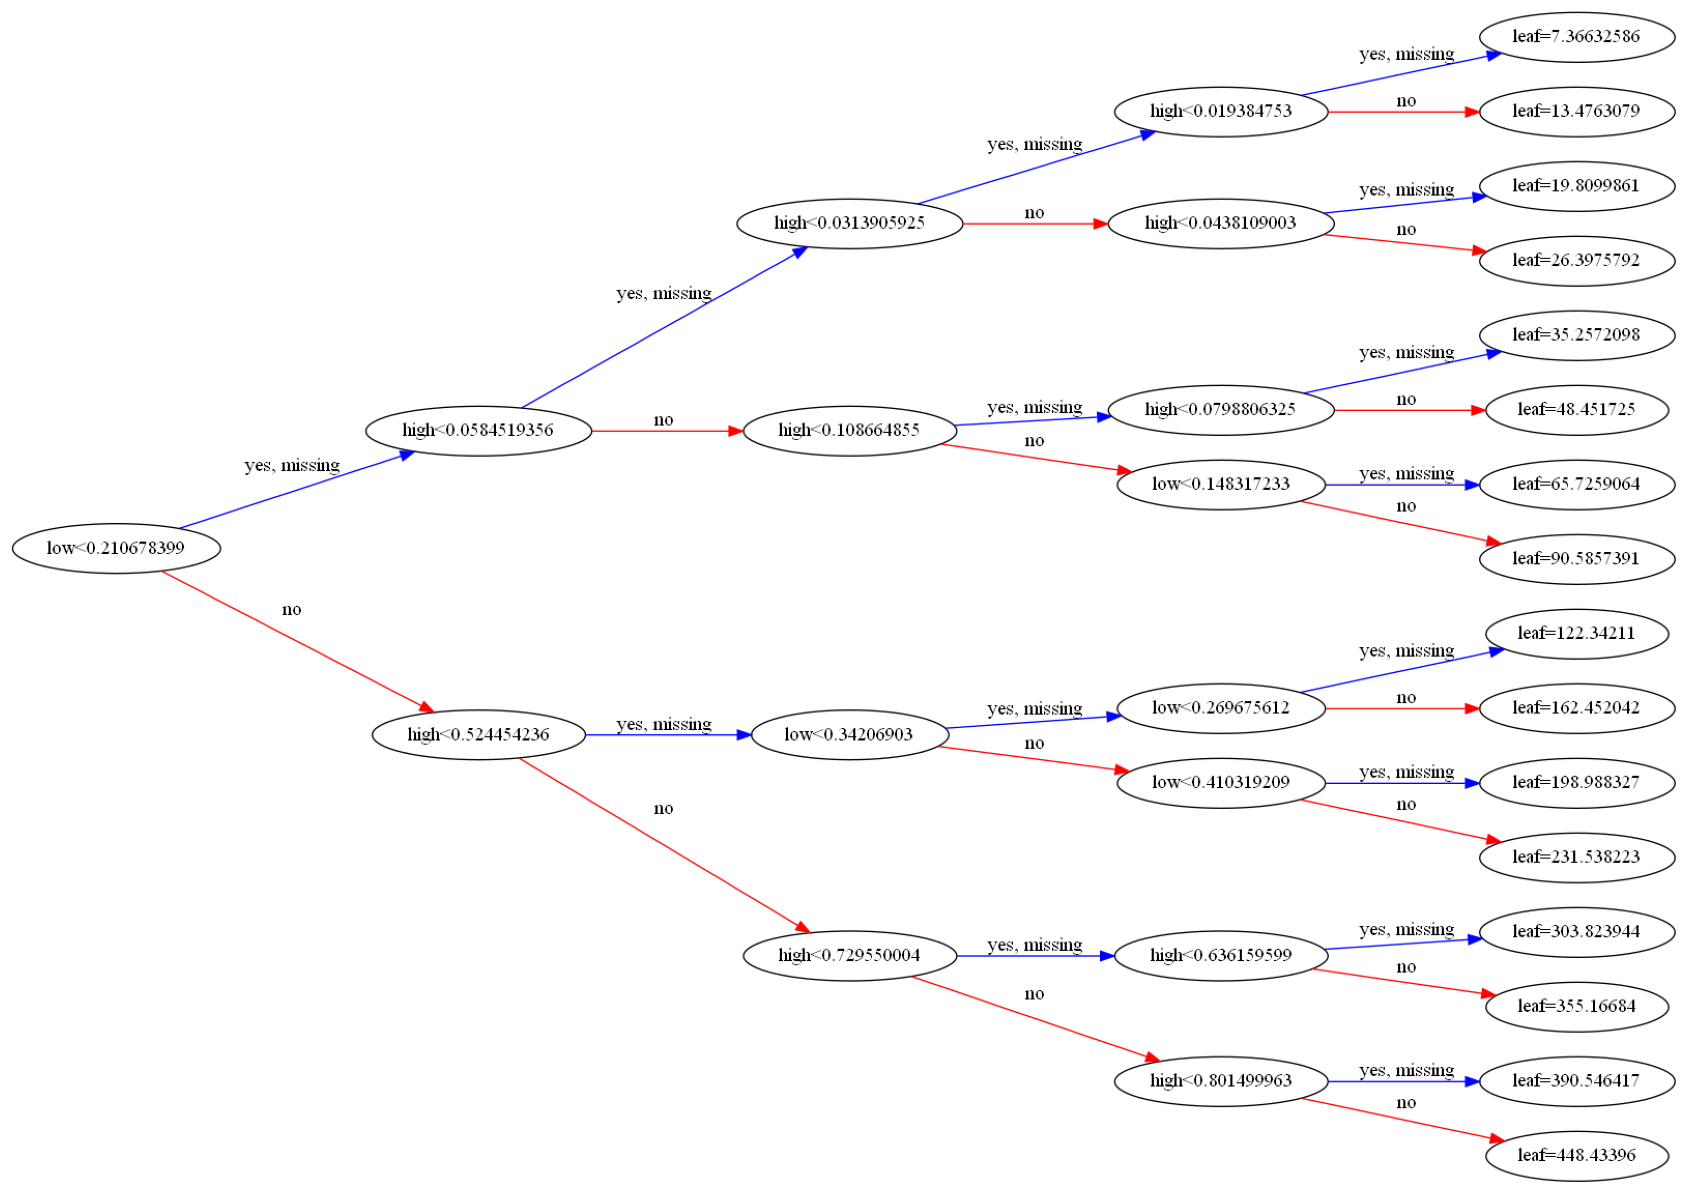

In [84]:
plot_tree(model, rankdir='LR');

In [85]:
#jovian.commit()      

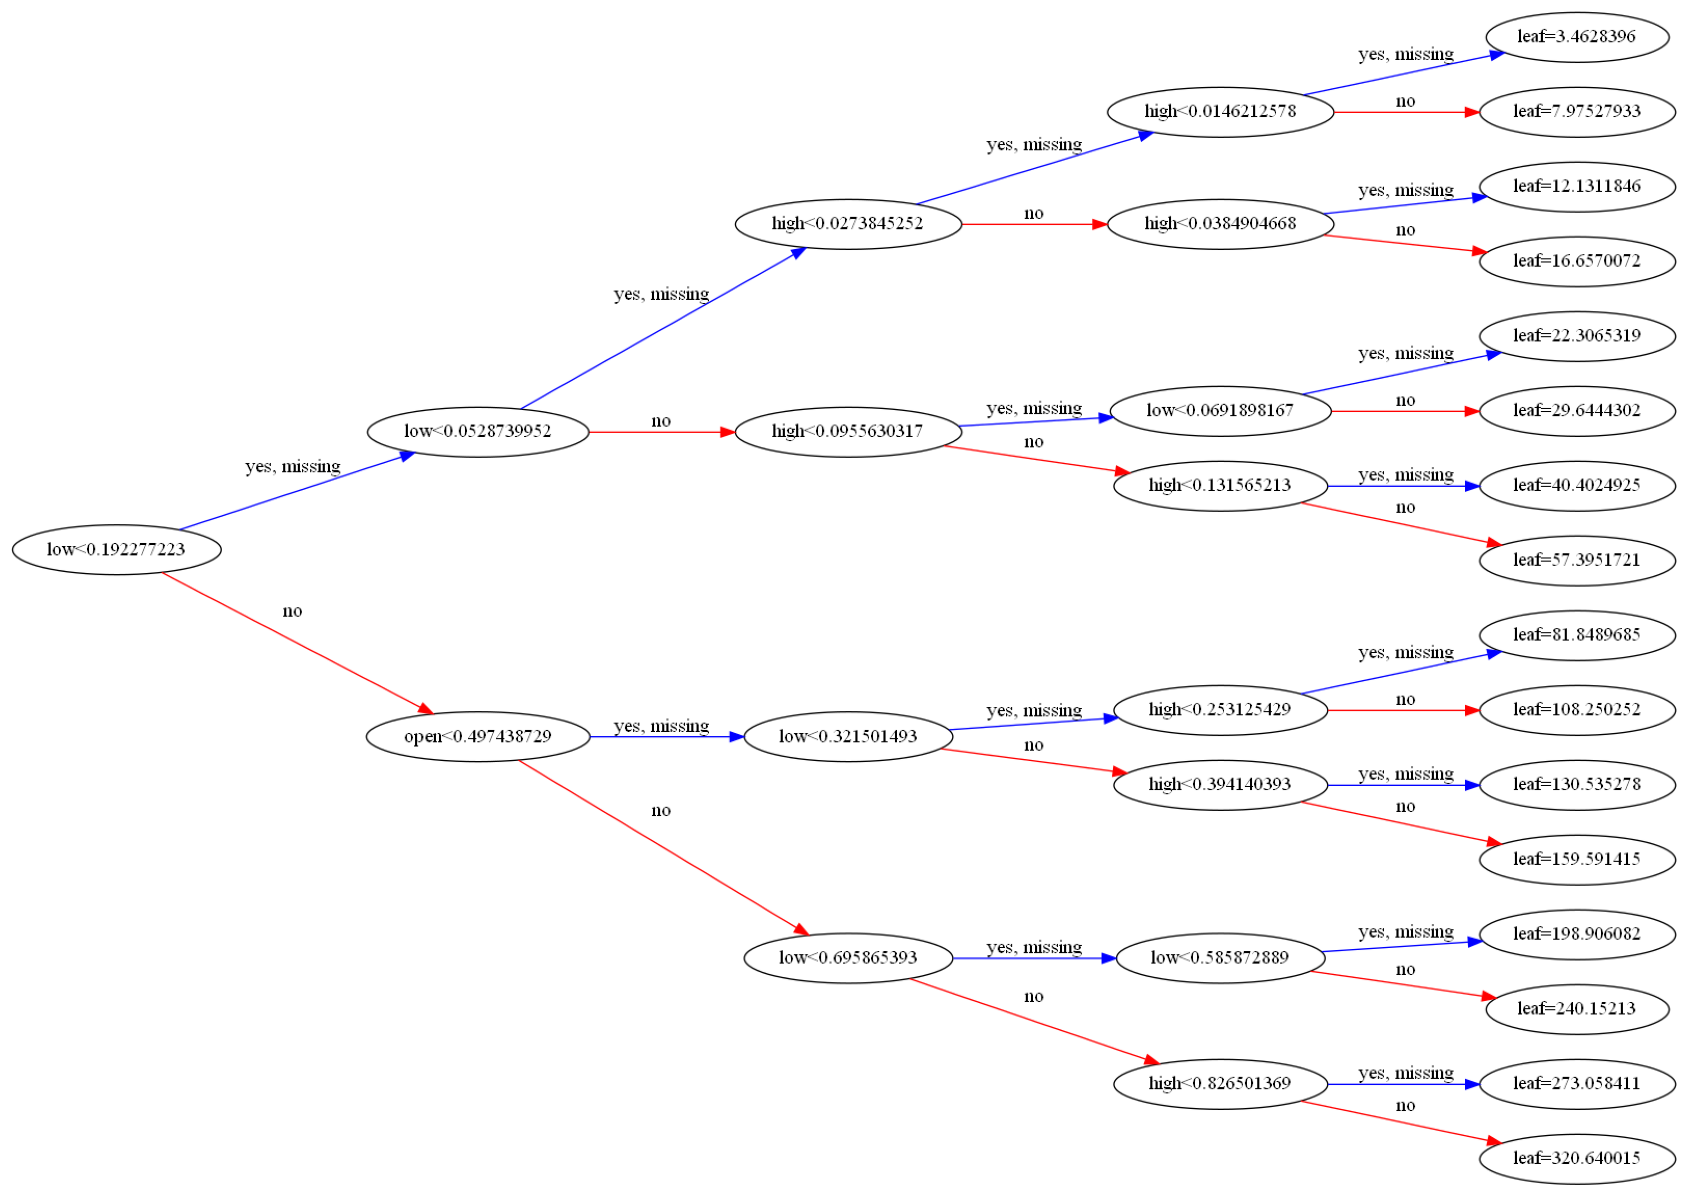

In [86]:
plot_tree(model, rankdir='LR', num_trees=1);

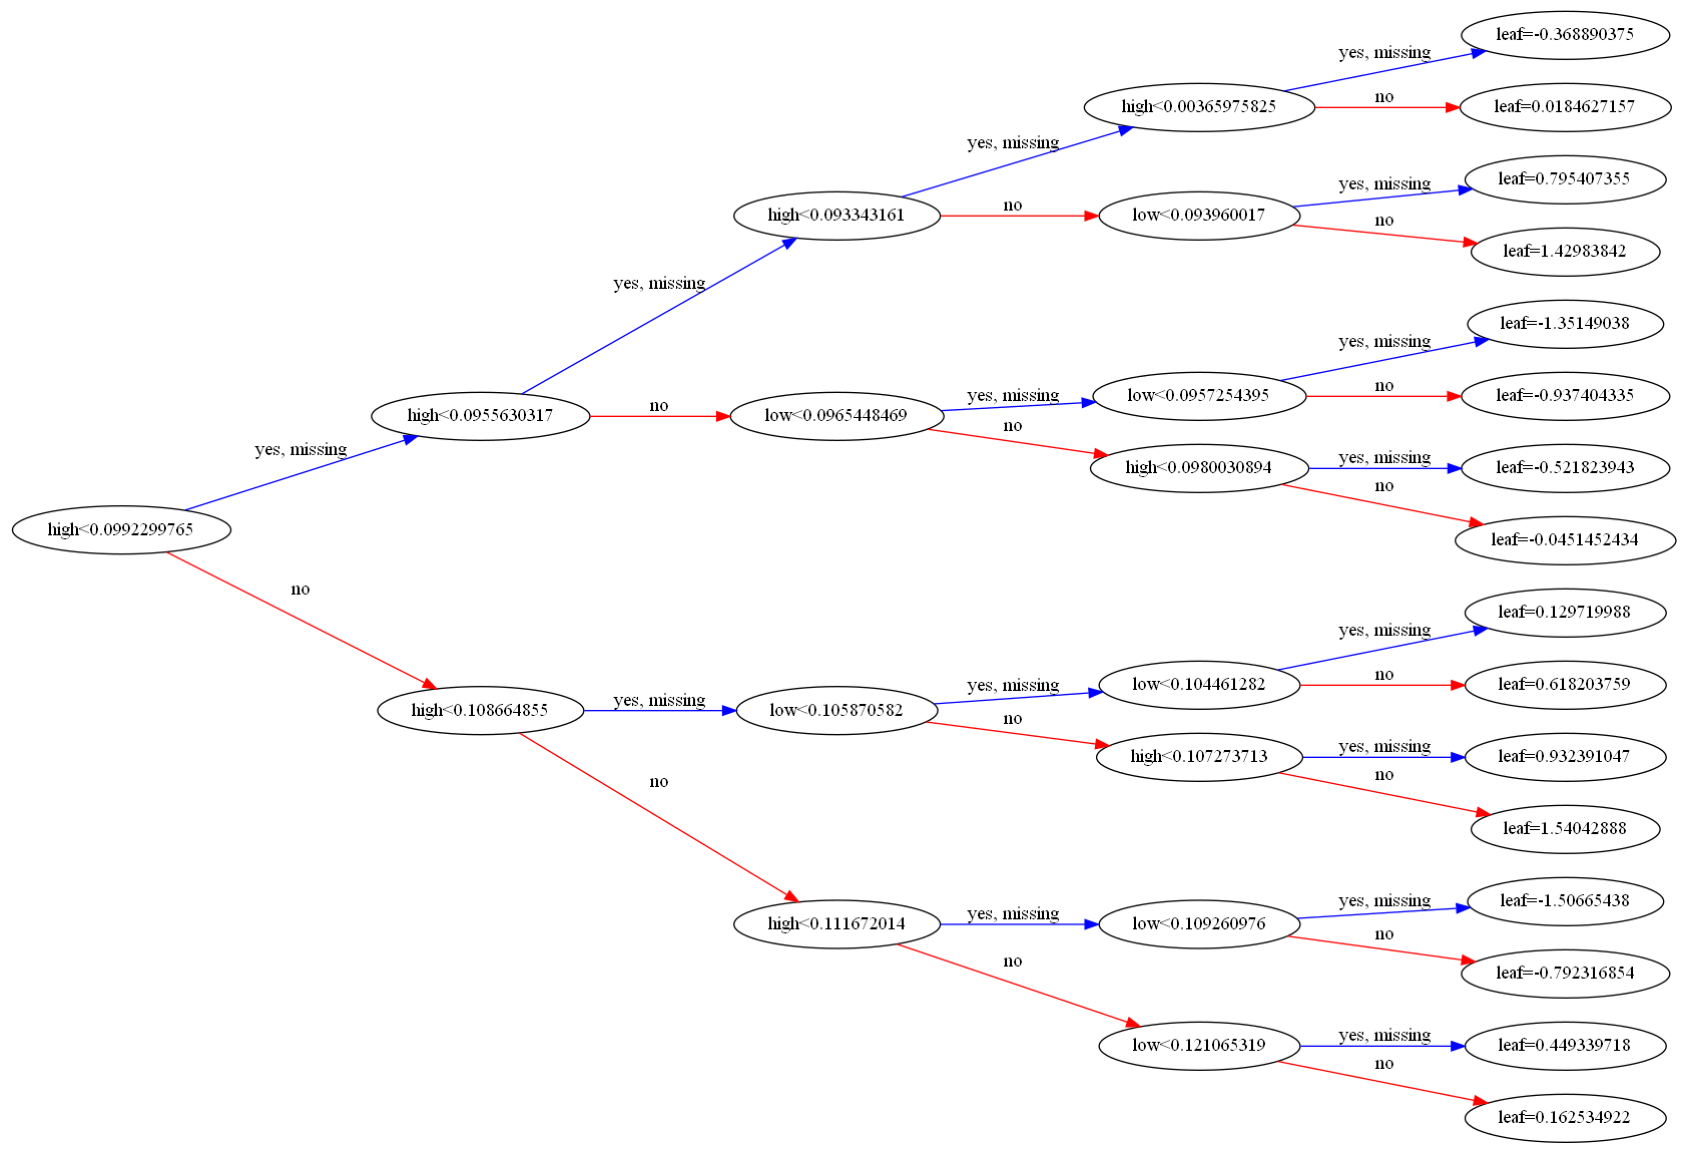

In [87]:
plot_tree(model, rankdir='LR', num_trees=19);

In [88]:
trees = model.get_booster().get_dump()

In [89]:
len(trees)

20

In [90]:
print(trees[0])

0:[low<0.210678399] yes=1,no=2,missing=1
	1:[high<0.0584519356] yes=3,no=4,missing=3
		3:[high<0.0313905925] yes=7,no=8,missing=7
			7:[high<0.019384753] yes=15,no=16,missing=15
				15:leaf=7.36632586
				16:leaf=13.4763079
			8:[high<0.0438109003] yes=17,no=18,missing=17
				17:leaf=19.8099861
				18:leaf=26.3975792
		4:[high<0.108664855] yes=9,no=10,missing=9
			9:[high<0.0798806325] yes=19,no=20,missing=19
				19:leaf=35.2572098
				20:leaf=48.451725
			10:[low<0.148317233] yes=21,no=22,missing=21
				21:leaf=65.7259064
				22:leaf=90.5857391
	2:[high<0.524454236] yes=5,no=6,missing=5
		5:[low<0.34206903] yes=11,no=12,missing=11
			11:[low<0.269675612] yes=23,no=24,missing=23
				23:leaf=122.34211
				24:leaf=162.452042
			12:[low<0.410319209] yes=25,no=26,missing=25
				25:leaf=198.988327
				26:leaf=231.538223
		6:[high<0.729550004] yes=13,no=14,missing=13
			13:[high<0.636159599] yes=27,no=28,missing=27
				27:leaf=303.823944
				28:leaf=355.16684
			14:[high<0.801499963] yes=29,

In [91]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

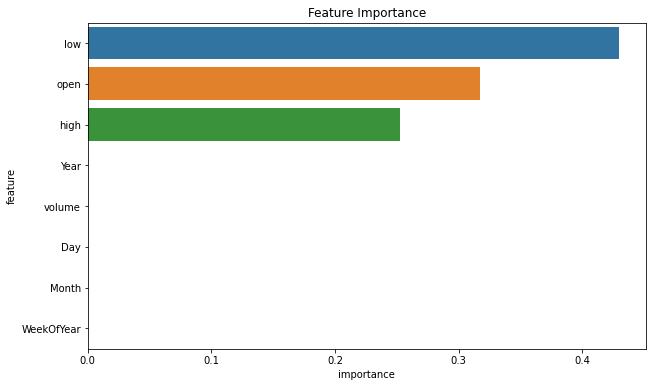

In [92]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [93]:
#jovian.commit()

In [94]:
from sklearn.model_selection import KFold

In [95]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse
    #**params means there is arbitrary number of parameters to the def

In [96]:
kfold = KFold(n_splits=5)

In [97]:
#jovian.commit()

In [98]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
    #iloc refers to location of index with integer

Train RMSE: 1.6261222865329583, Validation RMSE: 2.0226585038533207
Train RMSE: 1.7610344103400222, Validation RMSE: 1.6403808135379565
Train RMSE: 1.7585528955562133, Validation RMSE: 1.808882423183797
Train RMSE: 1.3997954014322505, Validation RMSE: 41.0539970351098
Train RMSE: 1.8129866995644677, Validation RMSE: 1.5709831922554542


In [99]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)
# axis=0 refers to column, axis=1 refers to rows

In [100]:
preds = predict_avg(models, X)

In [101]:
preds

array([14.806615, 14.806615, 14.539497, ..., 53.51949 , 53.51949 ,
       53.407726], dtype=float32)

In [102]:
#jovian.commit()

In [103]:
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [104]:
?XGBRegressor

In [105]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models
  # Do not see this function used any where in the code

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [108]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [109]:
test_params(n_estimators=10)

Train RMSE: 3.5468966411544947, Validation RMSE: 3.6108865838511517


In [110]:
test_params(n_estimators=10)

Train RMSE: 3.5468966411544947, Validation RMSE: 3.6108865838511517


In [111]:
test_params(n_estimators=100)

Train RMSE: 0.6862824468706947, Validation RMSE: 0.9192791456053283


In [112]:
test_params(n_estimators=240)

Train RMSE: 0.5220113584536212, Validation RMSE: 0.8320480988884655


In [113]:
test_params(max_depth=2)

Train RMSE: 2.5123952354227317, Validation RMSE: 2.4903109344683982


In [114]:
test_params(max_depth=5)

Train RMSE: 0.8247929219823614, Validation RMSE: 0.9439751089611612


In [115]:
test_params(max_depth=10)

Train RMSE: 0.4017694814988529, Validation RMSE: 0.7894453215759206


In [116]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 71.51052864268132, Validation RMSE: 70.50683938060466


In [117]:
test_params(n_estimators=40, learning_rate=0.02)

Train RMSE: 52.73082567233335, Validation RMSE: 52.024821800736476


In [118]:
test_params(n_estimators=40, learning_rate=0.2)

Train RMSE: 0.8109766222858814, Validation RMSE: 0.9349551643978622


In [119]:
test_params(n_estimators=40, learning_rate=0.7)

Train RMSE: 0.739568407357382, Validation RMSE: 0.942649962491046


In [120]:
test_params(n_estimators=40, learning_rate=0.99)

Train RMSE: 0.7226329594419791, Validation RMSE: 0.9476243319418277


In [121]:
test_params(booster='gblinear')

Train RMSE: 1.0177798592023228, Validation RMSE: 1.0075489069903227


In [122]:
#jovian.commit()

In [123]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1500, 
                     learning_rate=0.25, max_depth=12, subsample=0.9, 
                     colsample_bytree=0.7)

In [124]:
%%time
model.fit(X, targets)

CPU times: total: 2h 15min 54s
Wall time: 9min 3s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [125]:
np.set_printoptions(threshold=np.inf)

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [126]:
test_preds = model.predict(X_test)

In [127]:
test_preds

array([  44.957104 ,   43.99254  ,   43.576214 ,   42.99292  ,
         41.242165 ,   41.549404 ,   41.668297 ,   41.751633 ,
         41.87107  ,   40.65503  ,   40.09343  ,   41.363487 ,
         41.87461  ,   41.360012 ,   42.345387 ,   42.43496  ,
         42.432083 ,   42.607838 ,   42.24948  ,   41.219067 ,
         41.946125 ,   41.630585 ,   41.56214  ,   42.479843 ,
         43.015984 ,   44.44227  ,   43.869495 ,   44.030323 ,
         44.022713 ,   44.533146 ,   44.915287 ,   45.164032 ,
         46.367638 ,   46.93032  ,   46.739574 ,   43.019855 ,
         42.85798  ,   42.500313 ,   43.40705  ,   43.83177  ,
         43.559532 ,   44.202175 ,   44.638676 ,   46.342167 ,
         47.472996 ,   45.661663 ,   45.99436  ,   46.57562  ,
         45.347725 ,   45.37141  ,   44.95048  ,   45.001934 ,
         45.7604   ,   46.18415  ,   47.28552  ,   47.693737 ,
         48.540474 ,   48.20157  ,   47.88184  ,   49.06459  ,
         50.08264  ,   49.800377 ,   49.739754 ,   50.0

In [128]:
rmse(test_preds, test_targets)

6.376121510164719

In [129]:
test_df.insert(5, "Prediction", test_preds, True)

In [130]:
test_df

,date,open,high,low,close,Prediction,volume,Name,Date,Year,Month,Day,WeekOfYear
1026,2017-03-08,44.79,45.30,44.597,44.89,44.957104,5521109,AAL,2017-03-08,2017,3,8,10
1027,2017-03-09,44.50,44.93,43.250,43.33,43.992538,9330139,AAL,2017-03-09,2017,3,9,10
1028,2017-03-10,43.46,43.95,42.970,43.90,43.576214,6842316,AAL,2017-03-10,2017,3,10,10
1029,2017-03-13,43.73,44.12,42.260,42.37,42.992920,8882287,AAL,2017-03-13,2017,3,13,11
1030,2017-03-14,42.06,42.10,40.840,41.21,41.242165,10208460,AAL,2017-03-14,2017,3,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.690,77.82,77.470116,2982259,ZTS,2018-02-01,2018,2,1,5
619036,2018-02-02,77.53,78.12,76.730,76.78,77.217339,2595187,ZTS,2018-02-02,2018,2,2,5
619037,2018-02-05,76.64,76.92,73.180,73.83,73.820580,2962031,ZTS,2018-02-05,2018,2,5,6
619038,2018-02-06,72.74,74.56,72.130,73.27,73.521156,4924323,ZTS,2018-02-06,2018,2,6,6


In [131]:
train_df.insert(5, "Prediction", preds, True)

In [132]:
train_df

,date,open,high,low,close,Prediction,volume,Name,Date,Year,Month,Day,WeekOfYear
0,2013-02-08,15.07,15.1200,14.63,14.75,14.806615,8407500,AAL,2013-02-08,2013,2,8,6
1,2013-02-11,14.89,15.0100,14.26,14.46,14.806615,8882000,AAL,2013-02-11,2013,2,11,7
2,2013-02-12,14.45,14.5100,14.10,14.27,14.539497,8126000,AAL,2013-02-12,2013,2,12,7
3,2013-02-13,14.30,14.9400,14.25,14.66,14.806615,10259500,AAL,2013-02-13,2013,2,13,7
4,2013-02-14,14.94,14.9600,13.16,13.99,14.096224,31879900,AAL,2013-02-14,2013,2,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618802,2017-03-01,53.73,54.0800,53.55,53.89,53.519489,3581081,ZTS,2017-03-01,2017,3,1,9
618803,2017-03-02,54.00,54.0800,53.31,53.37,53.519489,3299974,ZTS,2017-03-02,2017,3,2,9
618804,2017-03-03,53.34,53.7175,53.25,53.42,53.519489,2483602,ZTS,2017-03-03,2017,3,3,9
618805,2017-03-06,53.01,53.3250,52.88,53.08,53.519489,1832305,ZTS,2017-03-06,2017,3,6,10


In [133]:
df = test_df

In [134]:
df.loc[df['Date'] == "2018-02-07"]

,date,open,high,low,close,Prediction,volume,Name,Date,Year,Month,Day,WeekOfYear
1258,2018-02-07,50.910,51.9800,50.8900,51.40,51.435936,4845831,AAL,2018-02-07,2018,2,7,6
2517,2018-02-07,163.085,163.4000,159.0685,159.54,160.332382,51608580,AAPL,2018-02-07,2018,2,7,6
3776,2018-02-07,112.090,114.5799,109.9000,109.93,112.482895,2163545,AAP,2018-02-07,2018,2,7,6
5035,2018-02-07,111.520,116.8500,111.3800,113.62,115.562920,10030837,ABBV,2018-02-07,2018,2,7,6
6294,2018-02-07,91.600,95.3400,91.1000,94.22,94.338264,2509484,ABC,2018-02-07,2018,2,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614003,2018-02-07,71.270,72.8600,71.1200,71.79,72.075218,1748941,XYL,2018-02-07,2018,2,7,6
615262,2018-02-07,80.070,81.9400,80.0000,80.13,81.336967,3561068,YUM,2018-02-07,2018,2,7,6
616521,2018-02-07,121.650,123.5200,120.7400,120.78,122.070358,1145267,ZBH,2018-02-07,2018,2,7,6
617780,2018-02-07,52.230,54.3150,52.2200,54.02,53.656242,6427280,ZION,2018-02-07,2018,2,7,6


In [135]:
df.loc[df['Name'] == "ZTS"]

,date,open,high,low,close,Prediction,volume,Name,Date,Year,Month,Day,WeekOfYear
618807,2017-03-08,53.02,53.410,52.790,53.00,52.970249,2095304,ZTS,2017-03-08,2017,3,8,10
618808,2017-03-09,53.05,53.715,52.910,53.69,53.333340,3187968,ZTS,2017-03-09,2017,3,9,10
618809,2017-03-10,53.70,53.760,53.195,53.34,53.407200,2833539,ZTS,2017-03-10,2017,3,10,10
618810,2017-03-13,53.33,53.625,53.240,53.56,53.291927,2297765,ZTS,2017-03-13,2017,3,13,11
618811,2017-03-14,53.33,53.550,53.060,53.42,53.063869,2277529,ZTS,2017-03-14,2017,3,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.270,76.690,77.82,77.470116,2982259,ZTS,2018-02-01,2018,2,1,5
619036,2018-02-02,77.53,78.120,76.730,76.78,77.217339,2595187,ZTS,2018-02-02,2018,2,2,5
619037,2018-02-05,76.64,76.920,73.180,73.83,73.820580,2962031,ZTS,2018-02-05,2018,2,5,6
619038,2018-02-06,72.74,74.560,72.130,73.27,73.521156,4924323,ZTS,2018-02-06,2018,2,6,6


In [136]:
Stock_Date = df[["Name", "Date"]]
#Stock_Date = df[["Name" == "ZTS", "Date" == "2018-02-07"]]
#df.loc[df['Name'] == "ZTS"] & df.loc[df['Date'] == "2018-02-07"]

In [137]:
stocks_above_100 = df[df["close"] > 100]

In [138]:
stocks_above_100

,date,open,high,low,close,Prediction,volume,Name,Date,Year,Month,Day,WeekOfYear
2285,2017-03-08,138.95,139.8000,138.82,139.00,139.377350,18707236,AAPL,2017-03-08,2017,3,8,10
2286,2017-03-09,138.74,138.7900,137.05,138.68,138.107178,22155904,AAPL,2017-03-09,2017,3,9,10
2287,2017-03-10,139.25,139.3571,138.64,139.14,138.810715,19612801,AAPL,2017-03-10,2017,3,10,10
2288,2017-03-13,138.85,139.4300,138.82,139.20,139.040878,17421717,AAPL,2017-03-13,2017,3,13,11
2289,2017-03-14,139.30,139.6500,138.84,138.99,138.908234,15309065,AAPL,2017-03-14,2017,3,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616517,2018-02-01,126.35,128.7200,125.71,128.19,127.159470,1756300,ZBH,2018-02-01,2018,2,1,5
616518,2018-02-02,127.05,127.2000,125.61,125.79,126.323906,1392663,ZBH,2018-02-02,2018,2,2,5
616519,2018-02-05,124.79,127.4200,122.37,123.18,125.283195,2098830,ZBH,2018-02-05,2018,2,5,6
616520,2018-02-06,121.00,122.9300,119.50,122.30,122.366417,2166000,ZBH,2018-02-06,2018,2,6,6


In [139]:
df["close"] > 100

1026      False
1027      False
1028      False
1029      False
1030      False
          ...  
619035    False
619036    False
619037    False
619038    False
619039    False
Name: close, Length: 117162, dtype: bool

In [140]:
largecap_stock = df[df["close"].isin([100, 150])]
#only stocks exactly 100 or 150 not all stock values between 100 and 150


In [141]:
largecap_stock

,date,open,high,low,close,Prediction,volume,Name,Date,Year,Month,Day,WeekOfYear
69088,2018-02-01,98.95,100.040,98.400,100.0,99.456398,2952078,AXP,2018-02-01,2018,2,1,5
263747,2017-08-09,101.00,101.050,99.750,100.0,100.392845,1575645,HAS,2017-08-09,2017,8,9,32
271225,2017-04-21,148.49,150.146,148.400,150.0,149.276077,5019927,HD,2017-04-21,2017,4,21,16
271316,2017-08-30,150.00,150.250,149.280,150.0,149.625290,3640966,HD,2017-08-30,2017,8,30,35
295451,2017-10-26,149.63,150.300,148.700,150.0,149.305099,171280,IFF,2017-10-26,2017,10,26,43
358541,2017-05-19,100.11,100.430,98.960,100.0,99.779366,642187,MAA,2017-05-19,2017,5,19,20
453730,2017-05-23,100.09,100.290,99.250,100.0,99.539261,605877,PKG,2017-05-23,2017,5,23,21
510603,2017-07-21,150.48,152.500,148.655,150.0,150.393539,1522415,SNA,2017-07-21,2017,7,21,29
546877,2018-02-01,149.68,150.480,148.800,150.0,149.406174,1993858,TRV,2018-02-01,2018,2,1,5
551714,2017-04-19,99.83,100.000,99.690,100.0,99.670120,3664300,TWX,2017-04-19,2017,4,19,16


In [142]:
stocks_name_above = df.loc[df["close"] > 200, "Name"]

In [143]:
stocks_name_above

10060     ADBE
10063     ADBE
16134      ADS
16135      ADS
16136      ADS
          ... 
587631     WAT
587632     WAT
587633     WAT
601403    WYNN
601404    WYNN
Name: Name, Length: 8843, dtype: object

In [144]:
df.iloc[1:500, 2:5]

,high,low,close
1027,44.93,43.2500,43.33
1028,43.95,42.9700,43.90
1029,44.12,42.2600,42.37
1030,42.10,40.8400,41.21
1031,42.19,40.2099,42.09
...,...,...,...
3573,144.77,141.5300,142.42
3574,146.82,143.0900,146.56
3575,147.02,145.0300,146.84
3576,148.35,145.9200,147.10


In [145]:
#jovian.commit()